In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [3]:
X,y = sklearn.datasets.make_moons(200, noise=0.20)

In [4]:
X

array([[ 1.32172021e+00,  1.04773485e-01],
       [ 1.16545768e+00, -6.06196741e-01],
       [ 4.60054133e-01, -5.06122031e-01],
       [ 1.48434313e+00, -6.07244888e-01],
       [-7.65479547e-02, -8.60684152e-02],
       [-1.12656461e+00,  1.56214433e-01],
       [ 5.79647363e-01,  1.12559830e+00],
       [ 6.13121252e-01,  8.30722468e-01],
       [-2.59095587e-01,  3.76945912e-01],
       [ 2.16032074e-01,  8.65202266e-01],
       [ 5.94221083e-01, -2.83731003e-01],
       [ 1.93250212e+00,  3.31594931e-01],
       [-4.58349834e-01,  4.12578080e-01],
       [ 4.59530750e-01, -3.46103122e-01],
       [ 1.07603772e+00, -4.93675166e-01],
       [ 1.22529984e+00, -6.59876445e-01],
       [ 2.00389264e+00, -2.07297447e-01],
       [ 8.91779503e-01, -5.76602016e-01],
       [ 1.25479920e+00, -8.93096642e-01],
       [ 7.83562188e-01,  1.06265983e+00],
       [ 7.98403728e-01, -4.45577809e-01],
       [-1.11874824e+00,  5.94728702e-01],
       [-9.66451768e-01,  5.75149840e-01],
       [ 3.

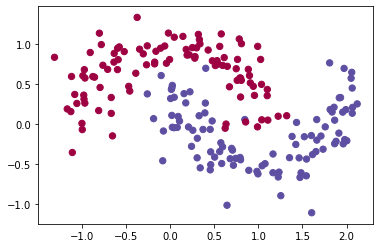

In [5]:
plt.scatter(X[:, 0],X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [6]:
X = torch.FloatTensor(X)

In [7]:
y = torch.LongTensor(y) # Long Tensors are good for labels

In [8]:
class FeedForward(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)
        
    def forward(self, x): # We want to override the default foward function
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [9]:
network = FeedForward(input_neurons=2, hidden_neurons=50, output_neurons=2)

In [10]:
optimizer = torch.optim.SGD(network.parameters(), lr=.02)

In [11]:
loss_fn = nn.CrossEntropyLoss() # Cannot use Binary Cross Entropy becuase it has more than two outputs

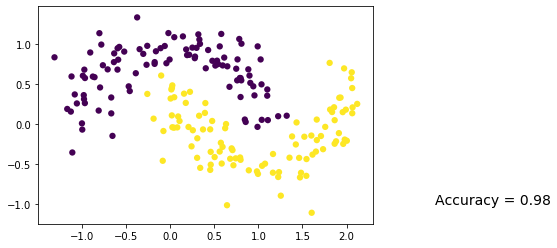

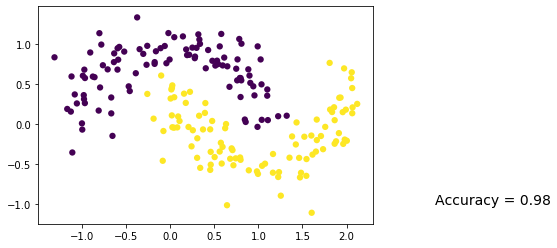

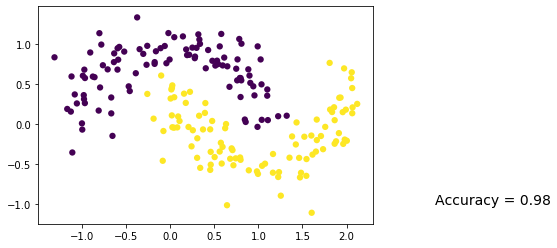

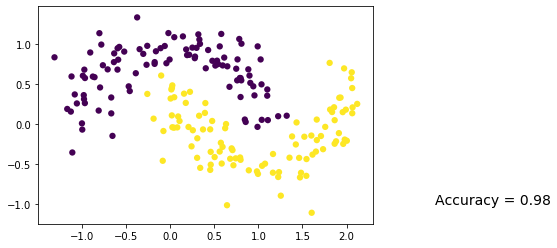

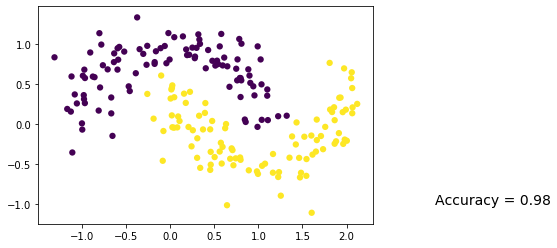

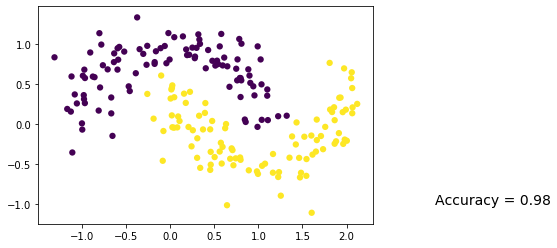

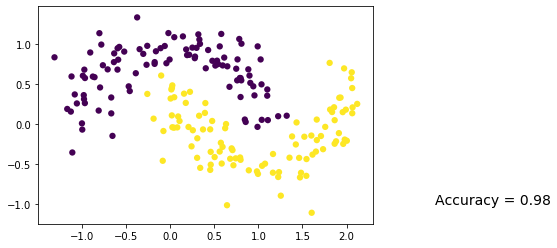

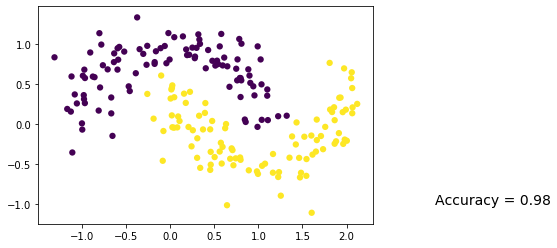

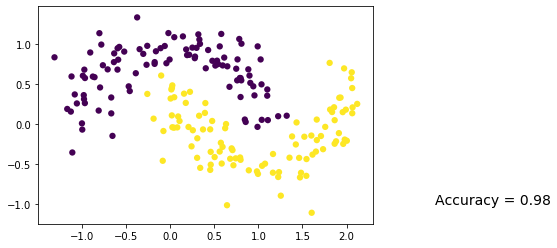

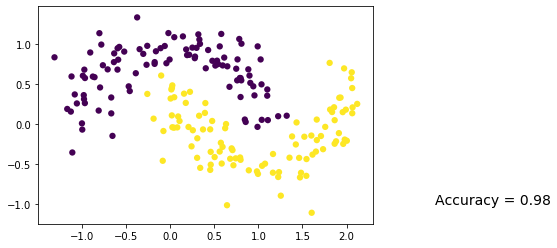

In [15]:
plt.ion() # interactive mode on
for epoch in range(10000):
    out = network(X) # or network.forward(X)
    loss = loss_fn(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        max_value, prediction = torch.max(out, 1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(X.data.numpy()[:,0],X.data.numpy()[:,1], s=40, c=predicted_y, lw=0)
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3,-1,'Accuracy = {:.2f}'.format(accuracy), fontdict={'size':14})
        plt.pause(0.1)
        
plt.ioff() # interactive mode off
plt.show()